# **Dataset exploration**

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import imageio
from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm
from tqdm import trange, tqdm
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [1]:
pip install geoplot

     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 10.8 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 36.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 10.0 MB/s 
     |████████████████████████████████| 16.7 MB 491 kB/s 
     |████████████████████████████████| 6.3 MB 37.1 MB/s 
     |████████████████████████████████| 44 kB 2.3 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.

In [6]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [9]:
city_data = data.drop_duplicates(['City'])
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E


## **Preprocessing, Advanced Visualization**

([<matplotlib.patches.Wedge at 0x7fa1c57b0910>,
 [Text(-1.0950344628649946, 0.10440079088767877, 'Non NaN elements'),
  Text(1.3936802176892007, -0.132873815410646, 'NaN elements')])

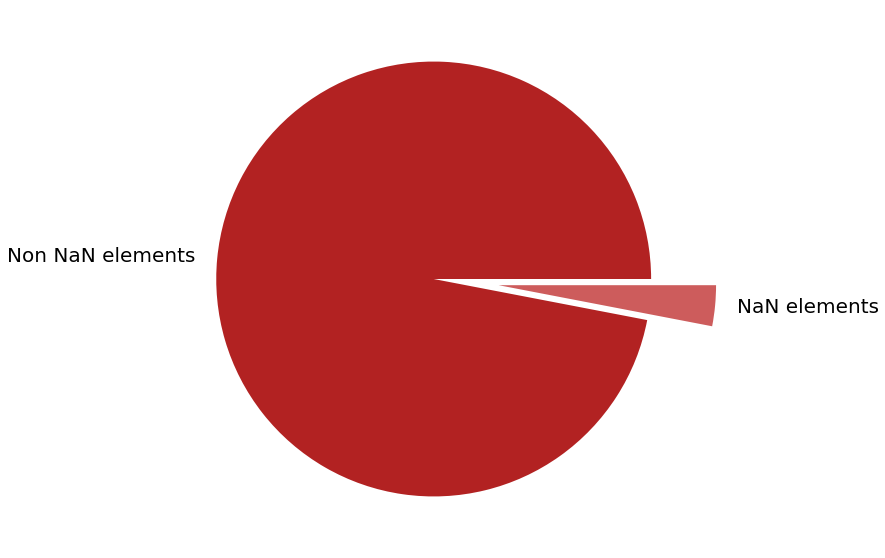

In [10]:
explodes = (0,0.3)
plt.pie(data[data['City']=='Chicago'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [11]:
chicago_data = data[data['City']=='Chicago']
chicago_data['AverageTemperature']=chicago_data.AverageTemperature.fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
chicago_data['AverageTemperatureUncertainty']=chicago_data.AverageTemperatureUncertainty.fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
chicago_data = chicago_data.reset_index()
chicago_data = chicago_data.drop(columns=['index'])
chicago_data.dt = pd.to_datetime(chicago_data.dt)
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(chicago_data)):
    WEEKDAY.append(chicago_data.dt[i].weekday())
    DAY.append(chicago_data.dt[i].day)
    MONTH.append(chicago_data.dt[i].month)
    YEAR.append(chicago_data.dt[i].year)
chicago_data['Year'] = YEAR
chicago_data['Month'] = MONTH
chicago_data['Day'] = DAY 
chicago_data['Weekday'] = WEEKDAY
change_year_index = []
change_year = []
year_list = chicago_data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)
chicago_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
2,1744-01-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744,1,1,2
14,1745-01-01,-0.901,2.649,Chicago,United States,42.59N,87.27W,1745,1,1,4
26,1746-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1746,1,1,5
38,1747-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1747,1,1,6
50,1748-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1748,1,1,0


In [14]:
x_ticks_year_list=np.linspace(min(year_list),max(year_list),10).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1,len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year)==x_ticks_year_list[i])][0])

Text(0, 0.5, 'Average Temperature')

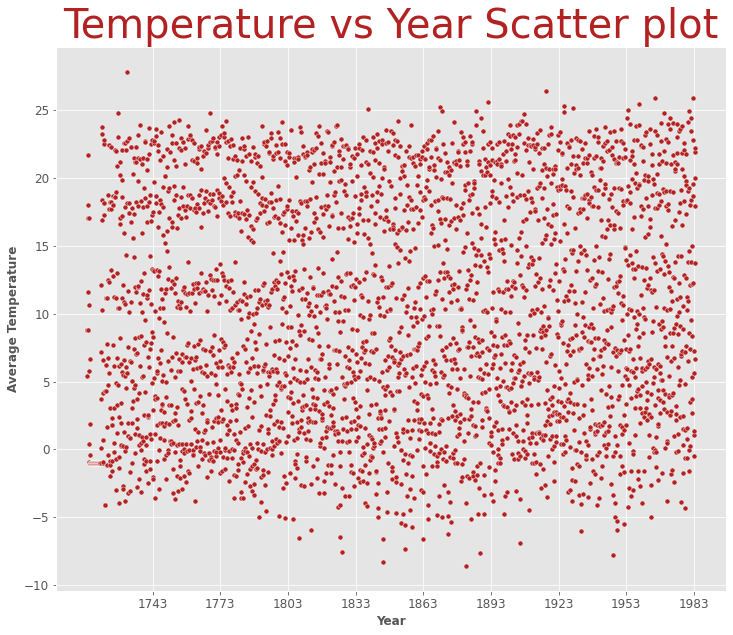

In [15]:
sns.scatterplot(x=chicago_data.index,y=chicago_data.AverageTemperature,s=25,color='firebrick')
plt.xticks(x_ticks_year_index,x_ticks_year_list)
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)
plt.xlabel('Year')
plt.ylabel('Average Temperature')

In [16]:
last_year_data = chicago_data[chicago_data.Year>=2010].reset_index().drop(columns=['index'])
P = np.linspace(0,len(last_year_data)-1,5).astype(int)

In [17]:
def get_timeseries(start_year,end_year):
    last_year_data = chicago_data[(chicago_data.Year>=start_year) & (chicago_data.Year<=end_year)].reset_index().drop(columns=['index'])
    return last_year_data

In [18]:
def plot_timeseries(start_year,end_year):
    last_year_data = get_timeseries(start_year,end_year)
    P = np.linspace(0,len(last_year_data)-1,5).astype(int)
    plt.plot(last_year_data.AverageTemperature,marker='.',color='firebrick')
    plt.xticks(np.arange(0,len(last_year_data),1)[P],last_year_data.dt.loc[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

In [19]:
def plot_from_data(data,time,c='firebrick',with_ticks=True,label=None):
    time = time.tolist()
    data = np.array(data.tolist())
    P = np.linspace(0,len(data)-1,5).astype(int)
    time = np.array(time)
    if label==None:
        plt.plot(data,marker='.',color=c)
    else:
        plt.plot(data,marker='.',color=c,label=label)
    if with_ticks==True:
        plt.xticks(np.arange(0,len(data),1)[P],time[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

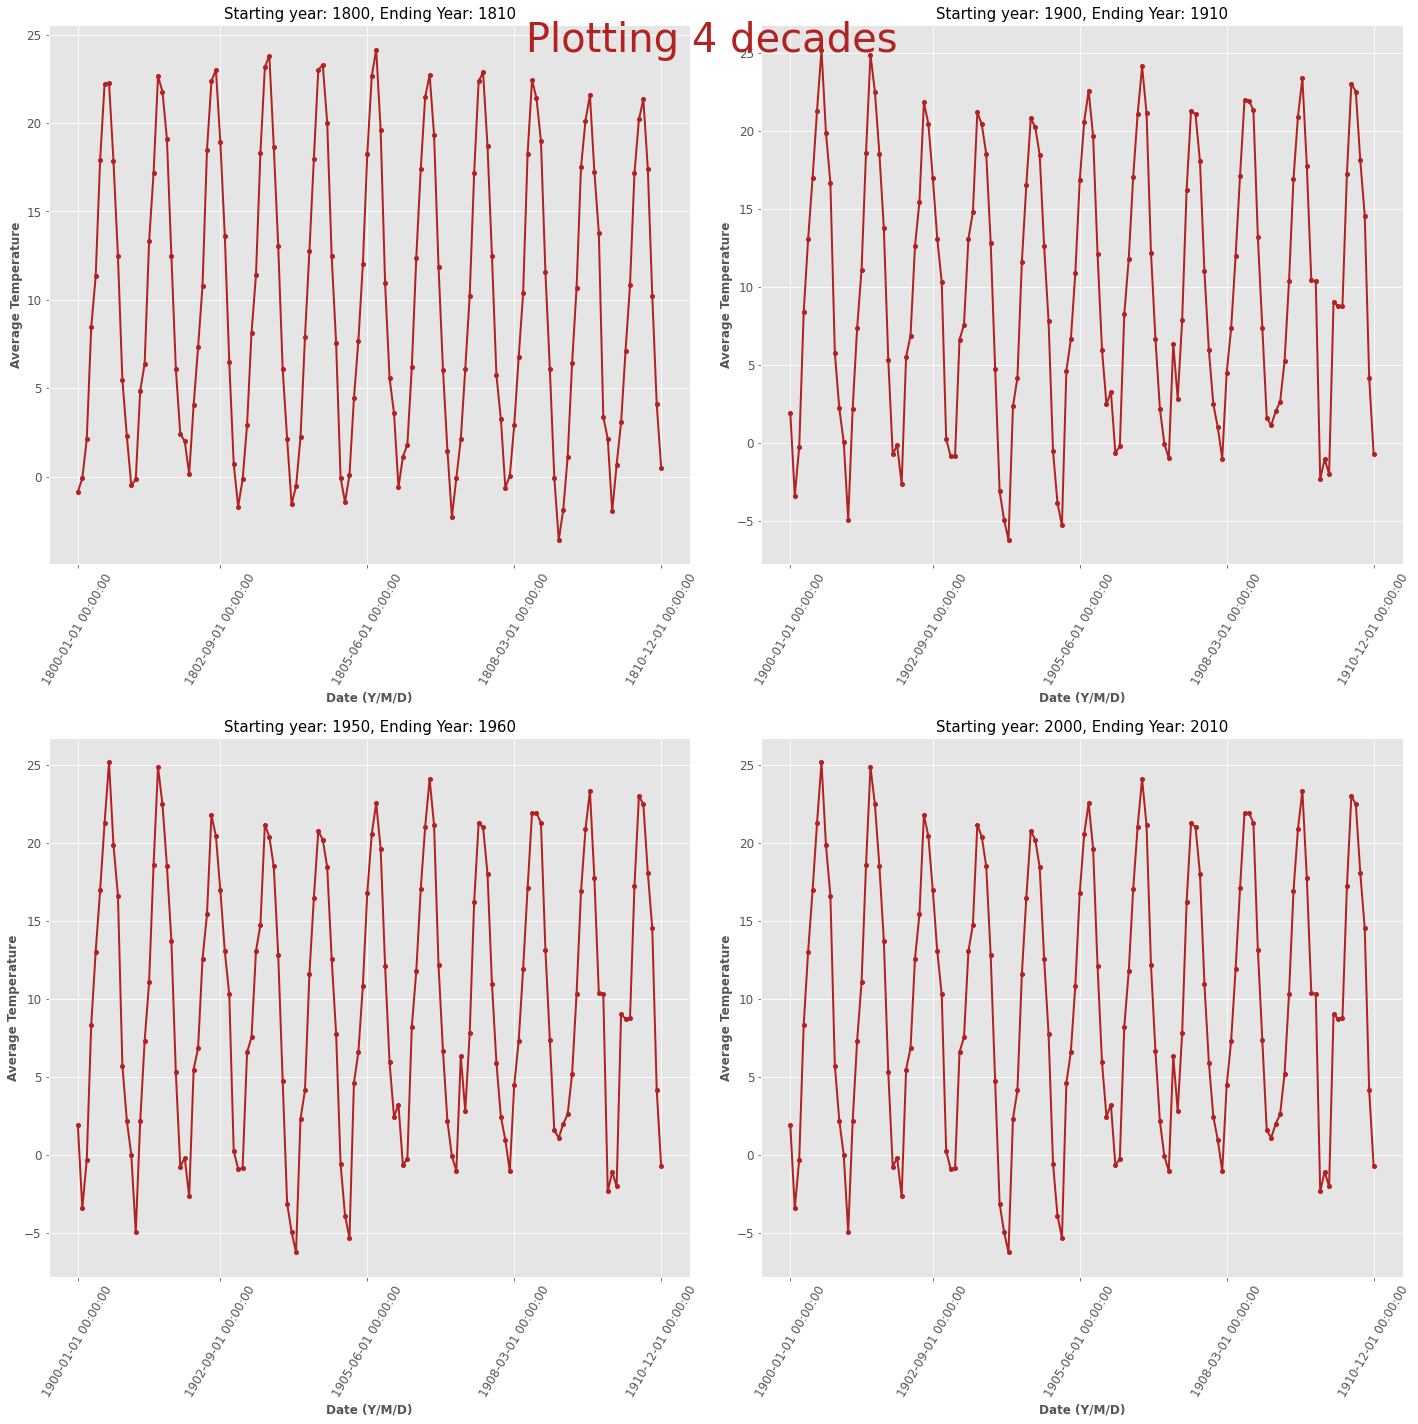

In [20]:
plt.figure(figsize=(20,20))
plt.suptitle('Plotting 4 decades',fontsize=40,color='firebrick')

plt.subplot(2,2,1)
plt.title('Starting year: 1800, Ending Year: 1810',fontsize=15)
plot_timeseries(1800,1810)
plt.subplot(2,2,2)
plt.title('Starting year: 1900, Ending Year: 1910',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,3)
plt.title('Starting year: 1950, Ending Year: 1960',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,4)
plt.title('Starting year: 2000, Ending Year: 2010',fontsize=15)
plot_timeseries(1900,1910)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


(2.0, 22.0)

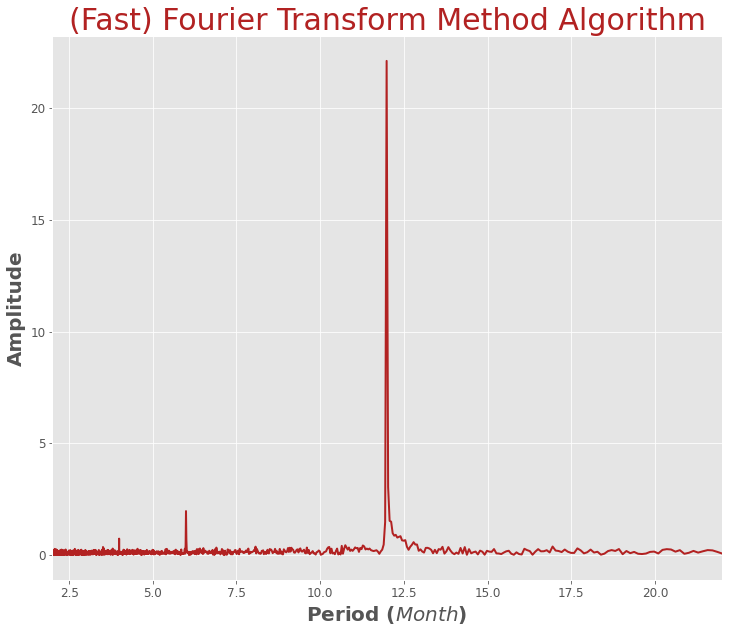

In [22]:
FFT = np.fft.fft(chicago_data.AverageTemperature)
FFT_abs = np.abs(FFT)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(0, f_nat/2, new_N, endpoint=True)
new_X = 1/new_X
plt.plot(new_X,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_X),color='firebrick')
plt.xlabel('Period ($Month$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=30,color='firebrick')
plt.grid(True)
plt.xlim(2,22)

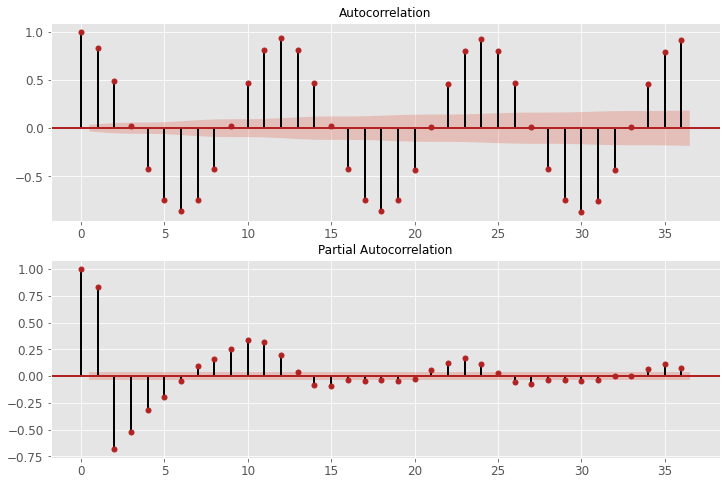

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(chicago_data.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(chicago_data.AverageTemperature, ax=ax2,color='firebrick')

In [24]:
result = adfuller(chicago_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -6.029493829973587
p-value: 1.4292530979861964e-07
Critical Values:
	1%: -3.4323875260668344
	5%: -2.862440255934873
	10%: -2.5672492261933377


In [25]:
result = adfuller(chicago_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the first decade: -2.0961224873860393
p-value: 0.24607662471034863
Critical Values:
	1%: -3.4901313156261384
	5%: -2.8877122815688776
	10%: -2.5807296460459184


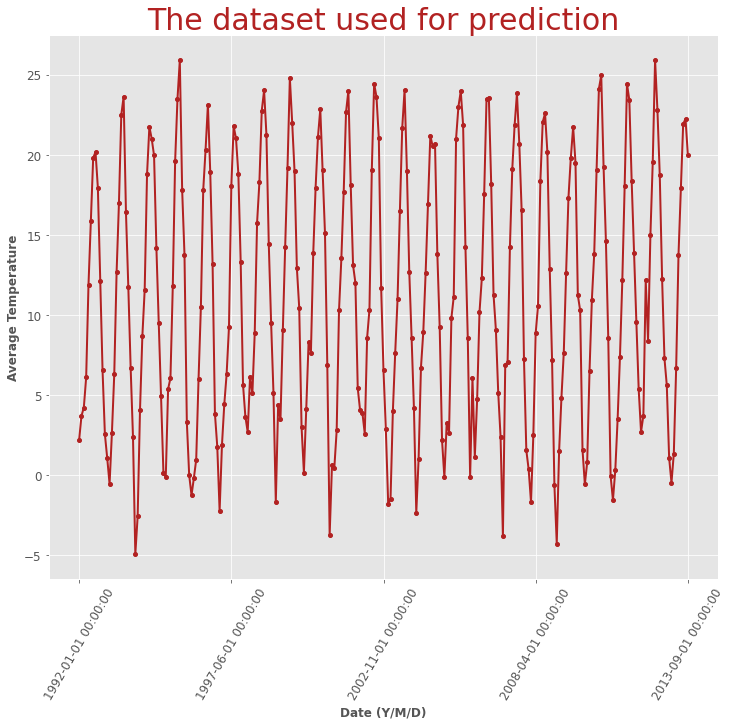

In [26]:
plt.title('The dataset used for prediction', fontsize=30,color='firebrick')
plot_timeseries(1992,2013)

In [27]:
temp = get_timeseries(1992,2013)
N = len(temp.AverageTemperature)
split = 0.95
training_size = round(split*N)
test_size = round((1-split)*N)
series = temp.AverageTemperature[:training_size]
date = temp.dt[:training_size]
test_series = temp.AverageTemperature[len(date)-1:len(temp)]
test_date = temp.dt[len(date)-1:len(temp)]
test_date = test_date.reset_index().dt
test_series = test_series.reset_index().AverageTemperature

In [28]:
test_date

0    2012-08-01
1    2012-09-01
2    2012-10-01
3    2012-11-01
4    2012-12-01
5    2013-01-01
6    2013-02-01
7    2013-03-01
8    2013-04-01
9    2013-05-01
10   2013-06-01
11   2013-07-01
12   2013-08-01
13   2013-09-01
Name: dt, dtype: datetime64[ns]

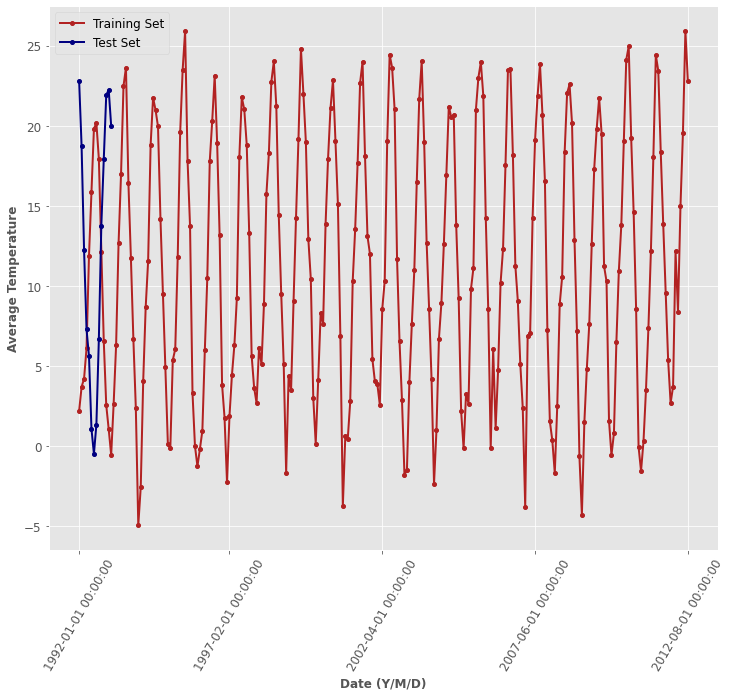

In [67]:
plot_from_data(series,date,label='Training Set')
plot_from_data(test_series,test_date,'navy',with_ticks=False,label='Test Set')
plt.legend()

In [66]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm.notebook(order_list):
        #try: 
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue
            
        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [68]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

In [69]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(4, 0, 6)",1097.387535
1,"(4, 0, 5)",1097.958830
2,"(5, 0, 6)",1097.983617
3,"(7, 0, 8)",1097.992644
4,"(5, 0, 7)",1098.254846


In [70]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

,"(p, d, q)",AIC
0,"(2, 1, 5)",1085.678018
1,"(2, 1, 6)",1089.722777
2,"(3, 1, 5)",1090.155576
3,"(8, 1, 9)",1090.728356
4,"(9, 1, 9)",1091.478704
...,...,...
95,"(1, 1, 1)",1404.131932
96,"(1, 1, 2)",1405.247740
97,"(0, 1, 1)",1428.962023
98,"(0, 1, 3)",1430.945726


In [71]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(2, 1, 5)",1085.678018
1,"(2, 1, 6)",1089.722777
2,"(3, 1, 5)",1090.155576
3,"(8, 1, 9)",1090.728356
4,"(9, 1, 9)",1091.478704


In [72]:
final_result = result_d_0.append(result_d_1)

In [73]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()

In [74]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [75]:
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:     AverageTemperature   No. Observations:                  248
Model:               SARIMAX(2, 1, 5)   Log Likelihood                -534.839
Date:                Sat, 23 Apr 2022   AIC                           1085.678
Time:                        12:09:33   BIC                           1113.753
Sample:                             0   HQIC                          1096.981
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7319      0.000   3489.055      0.000       1.731       1.733
ar.L2         -1.0000      0.000  -7983.285      0.000      -1.000      -1.000
ma.L1         -2.4648      0.617     -3.992      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Model (2,1,5) results:

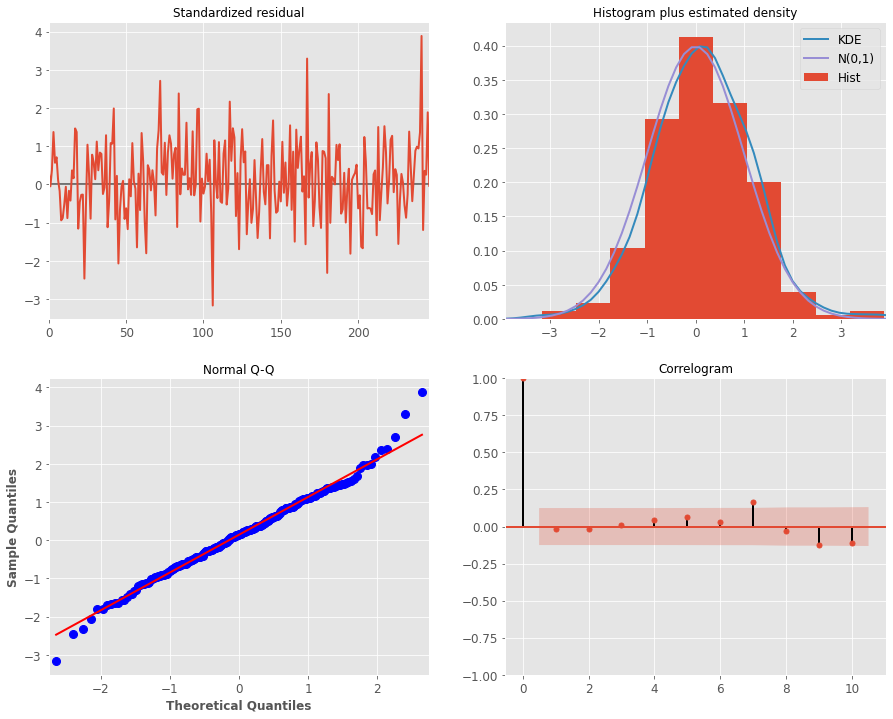

In [76]:
best_model_0.plot_diagnostics(figsize=(15,12))
plt.show()

# Model (2,1,6) results:

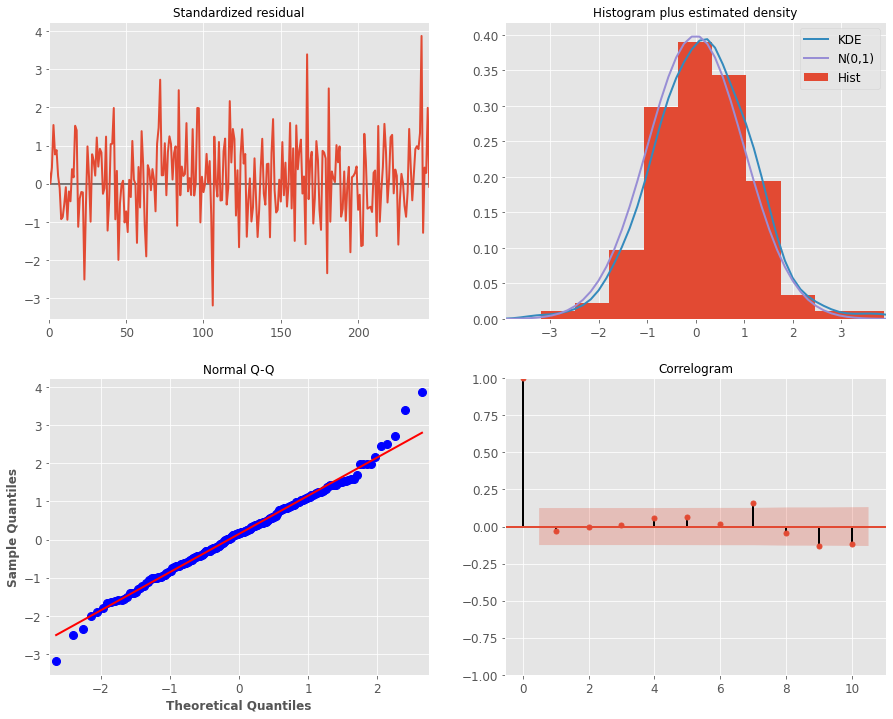

In [77]:
best_model_1.plot_diagnostics(figsize=(15,12))
plt.show()

In [78]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

s_forecast = best_model_1.get_prediction(start=training_size, end=training_size+fore_l)
s_forec = s_forecast.predicted_mean
s_ci = forecast.conf_int(alpha=0.05)

In [79]:
error_test=chicago_data.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]

In [80]:
lower_test = test_set-error_test
upper_test = test_set+error_test

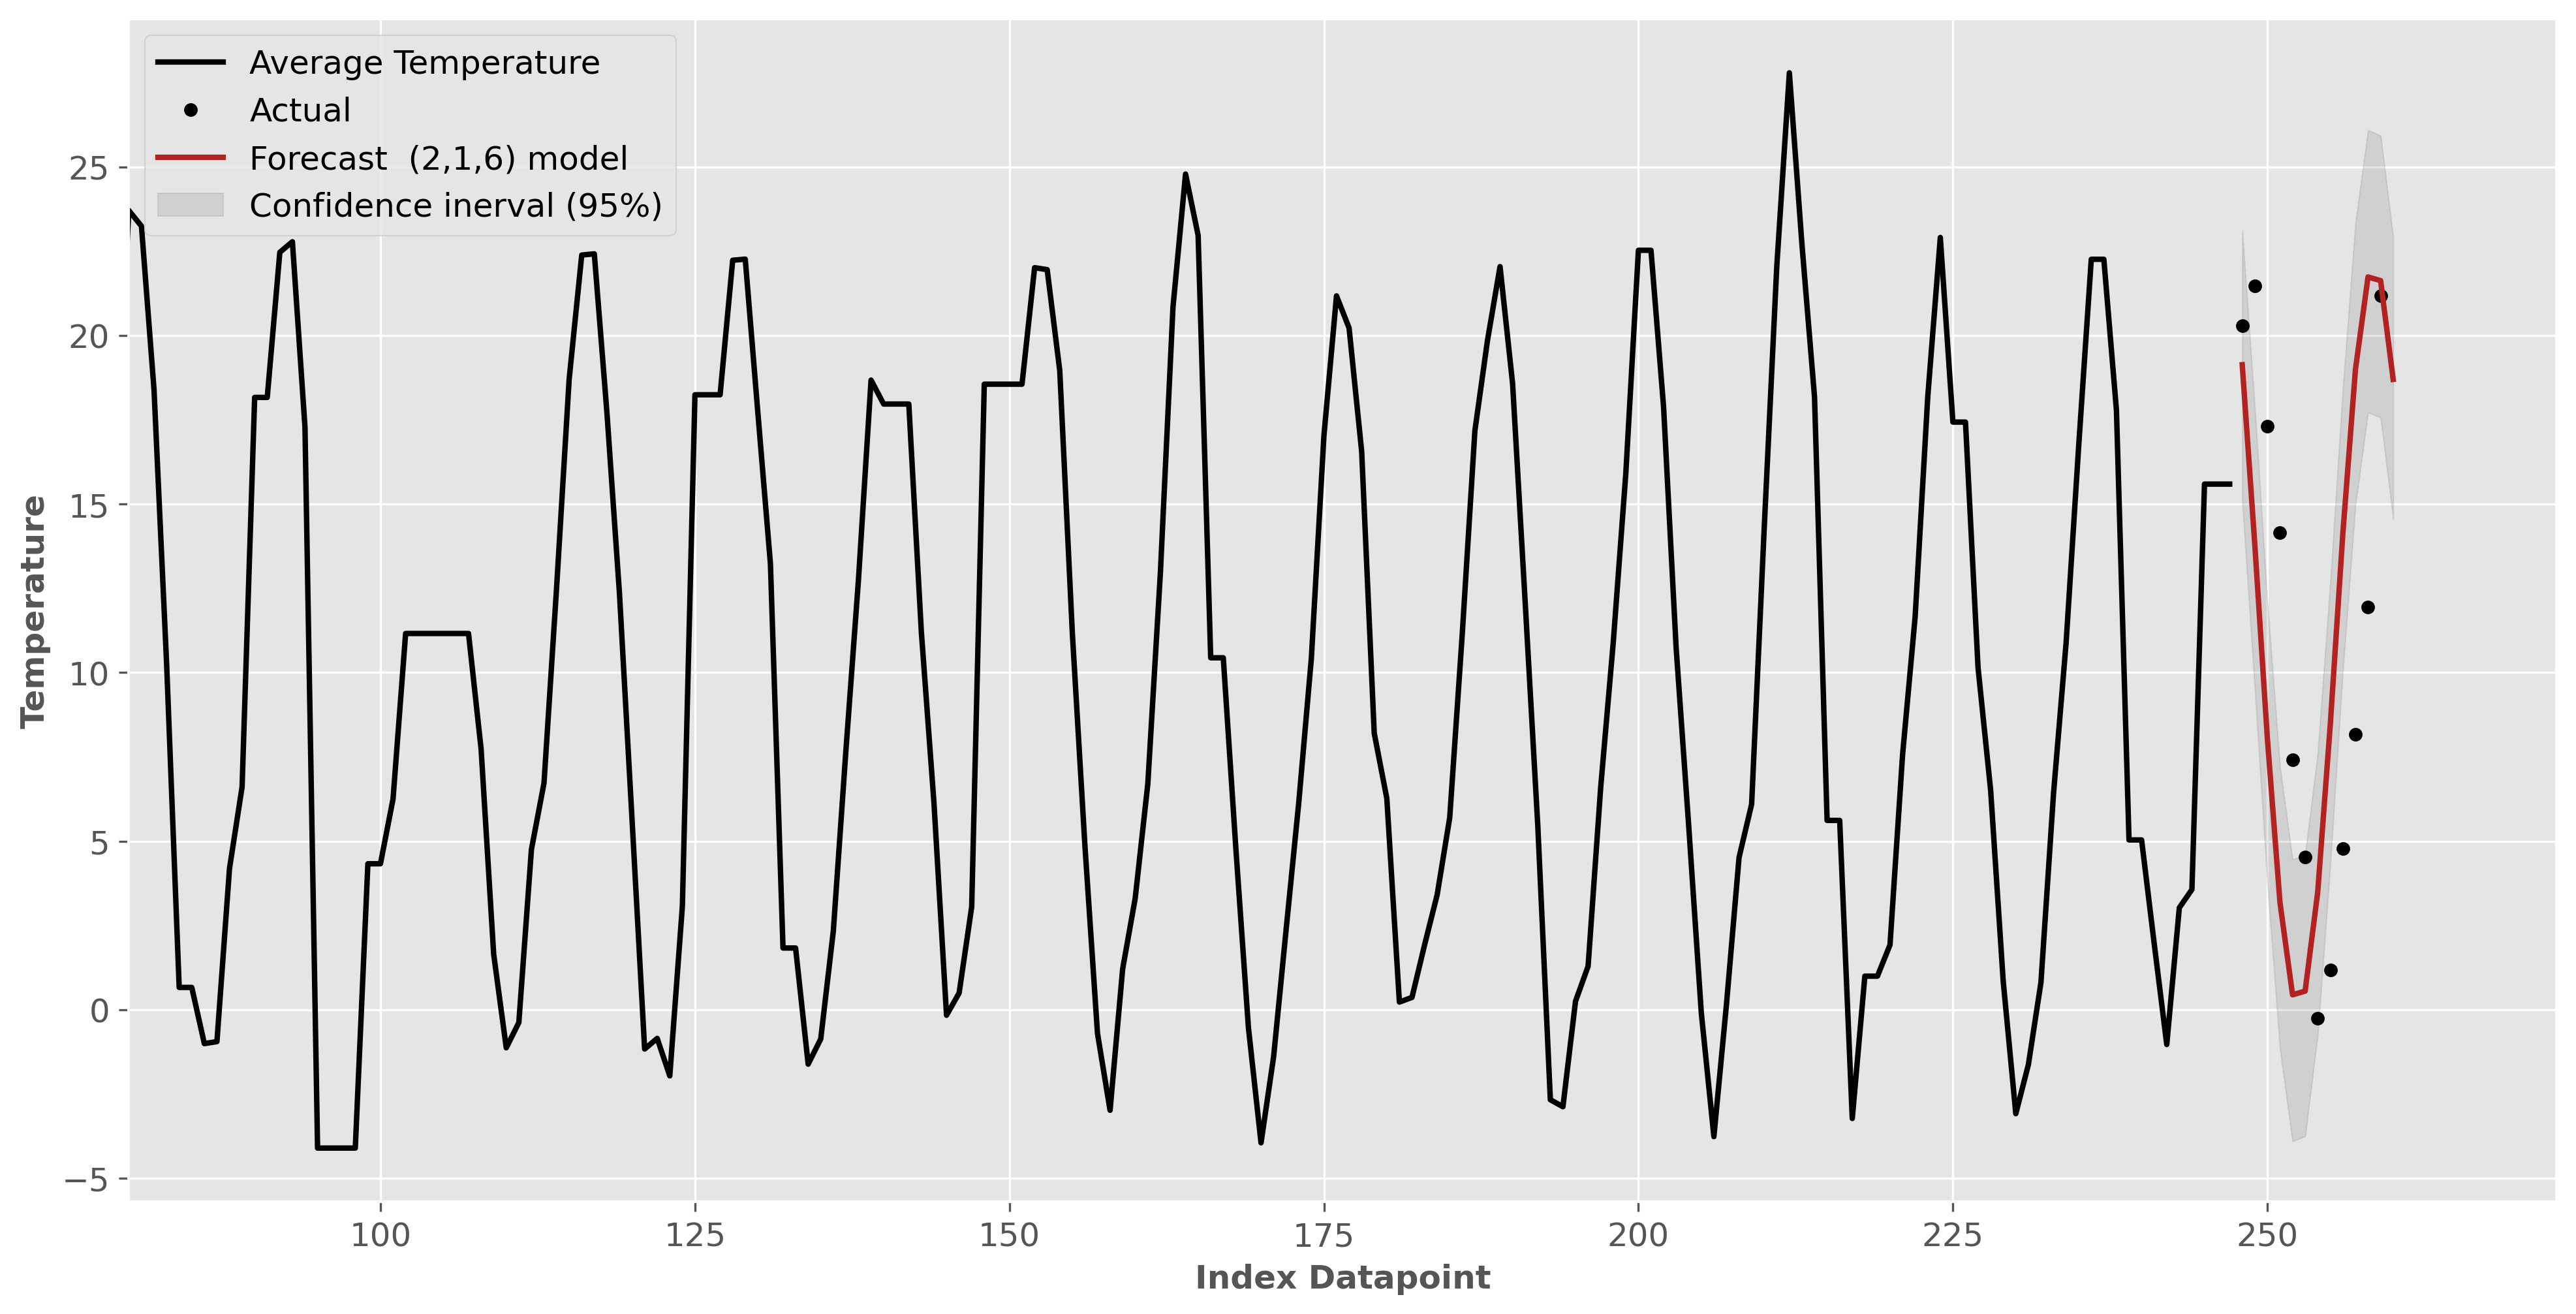

In [81]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = chicago_data.AverageTemperature.index[0:training_size]
x1=chicago_data.AverageTemperature.index[training_size:training_size+fore_l+1]
plt.plot(x0, chicago_data.AverageTemperature[0:training_size],'k', label = 'Average Temperature')

plt.plot(chicago_data.AverageTemperature[training_size:training_size+fore_l], '.k', label = 'Actual')

forec = pd.DataFrame(forec, columns=['f'], index = x1)

s_forec = pd.DataFrame(s_forec, columns=['f'], index = x1)
s_forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,6) model')
ax.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(80,)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

Text(0, 0.5, 'Temperature')

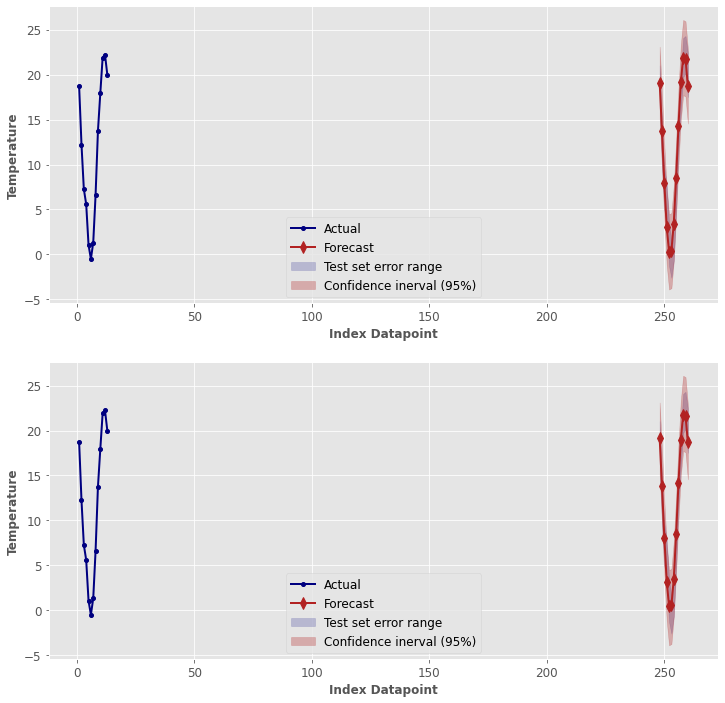

In [82]:

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(forec,marker='d',label="Forecast",color='firebrick')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.subplot(2,1,2)
plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(s_forec,marker='d',label="Forecast",color='firebrick')
plt.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')

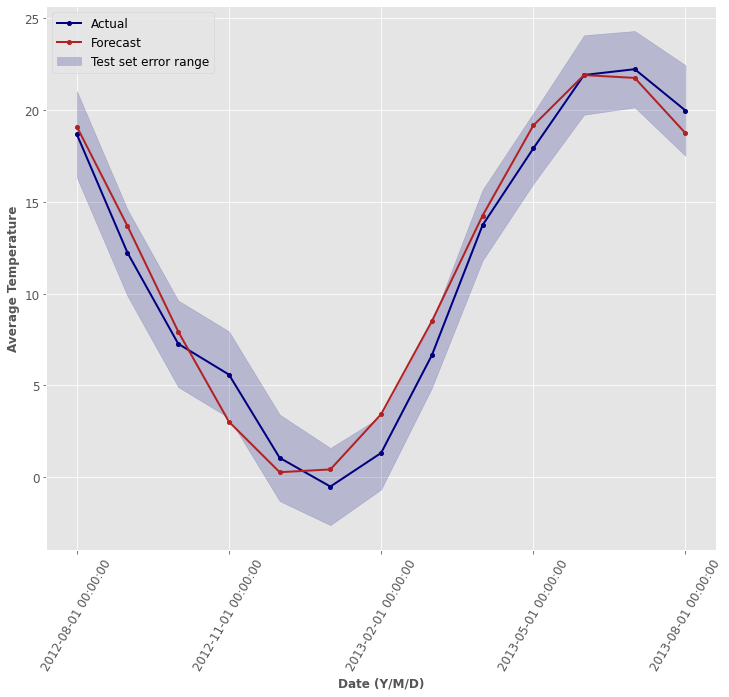

In [83]:
plt.fill_between(np.arange(0,len(test_set),1), lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plot_from_data(test_set,test_date,c='navy',label='Actual')
plot_from_data(forec['f'],test_date,c='firebrick',label='Forecast')
plt.legend(loc=2)